In [ ]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 109.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 67.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: t

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
# import data handling tools
# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
print ('modules loaded')

modules loaded


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/arun/Project/Birds/train'
filepaths = []
labels = []
folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
train_df

,filepaths,labels
0,/content/drive/MyDrive/arun/Project/Birds/trai...,EMU
1,/content/drive/MyDrive/arun/Project/Birds/trai...,EMU
2,/content/drive/MyDrive/arun/Project/Birds/trai...,EMU
3,/content/drive/MyDrive/arun/Project/Birds/trai...,EMU
4,/content/drive/MyDrive/arun/Project/Birds/trai...,EMU
...,...,...
16208,/content/drive/MyDrive/arun/Project/Birds/trai...,ASIAN CRESTED IBIS
16209,/content/drive/MyDrive/arun/Project/Birds/trai...,ASIAN CRESTED IBIS
16210,/content/drive/MyDrive/arun/Project/Birds/trai...,ASIAN CRESTED IBIS
16211,/content/drive/MyDrive/arun/Project/Birds/trai...,ASIAN CRESTED IBIS


In [ ]:
valid_dir = '/content/drive/MyDrive/arun/Project/Birds/valid'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
valid_df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
valid_df

,filepaths,labels
0,/content/drive/MyDrive/arun/Project/Birds/trai...,EMU
1,/content/drive/MyDrive/arun/Project/Birds/trai...,EMU
2,/content/drive/MyDrive/arun/Project/Birds/trai...,EMU
3,/content/drive/MyDrive/arun/Project/Birds/trai...,EMU
4,/content/drive/MyDrive/arun/Project/Birds/trai...,EMU
...,...,...
16208,/content/drive/MyDrive/arun/Project/Birds/trai...,ASIAN CRESTED IBIS
16209,/content/drive/MyDrive/arun/Project/Birds/trai...,ASIAN CRESTED IBIS
16210,/content/drive/MyDrive/arun/Project/Birds/trai...,ASIAN CRESTED IBIS
16211,/content/drive/MyDrive/arun/Project/Birds/trai...,ASIAN CRESTED IBIS


In [ ]:
# Generate  test data paths with labels
test_dir = '/content/drive/MyDrive/arun/Project/Birds/test'
filepaths = []
labels = []
folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
test_df

,filepaths,labels
0,/content/drive/MyDrive/arun/Project/Birds/test...,BROWN CREPPER
1,/content/drive/MyDrive/arun/Project/Birds/test...,BROWN CREPPER
2,/content/drive/MyDrive/arun/Project/Birds/test...,BROWN CREPPER
3,/content/drive/MyDrive/arun/Project/Birds/test...,BROWN CREPPER
4,/content/drive/MyDrive/arun/Project/Birds/test...,BROWN CREPPER
...,...,...
500,/content/drive/MyDrive/arun/Project/Birds/test...,KAGU
501,/content/drive/MyDrive/arun/Project/Birds/test...,KAGU
502,/content/drive/MyDrive/arun/Project/Birds/test...,KAGU
503,/content/drive/MyDrive/arun/Project/Birds/test...,KAGU


In [ ]:
# crobed image size
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)
valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 16213 validated image filenames belonging to 101 classes.
Found 16213 validated image filenames belonging to 101 classes.
Found 505 validated image filenames belonging to 101 classes.


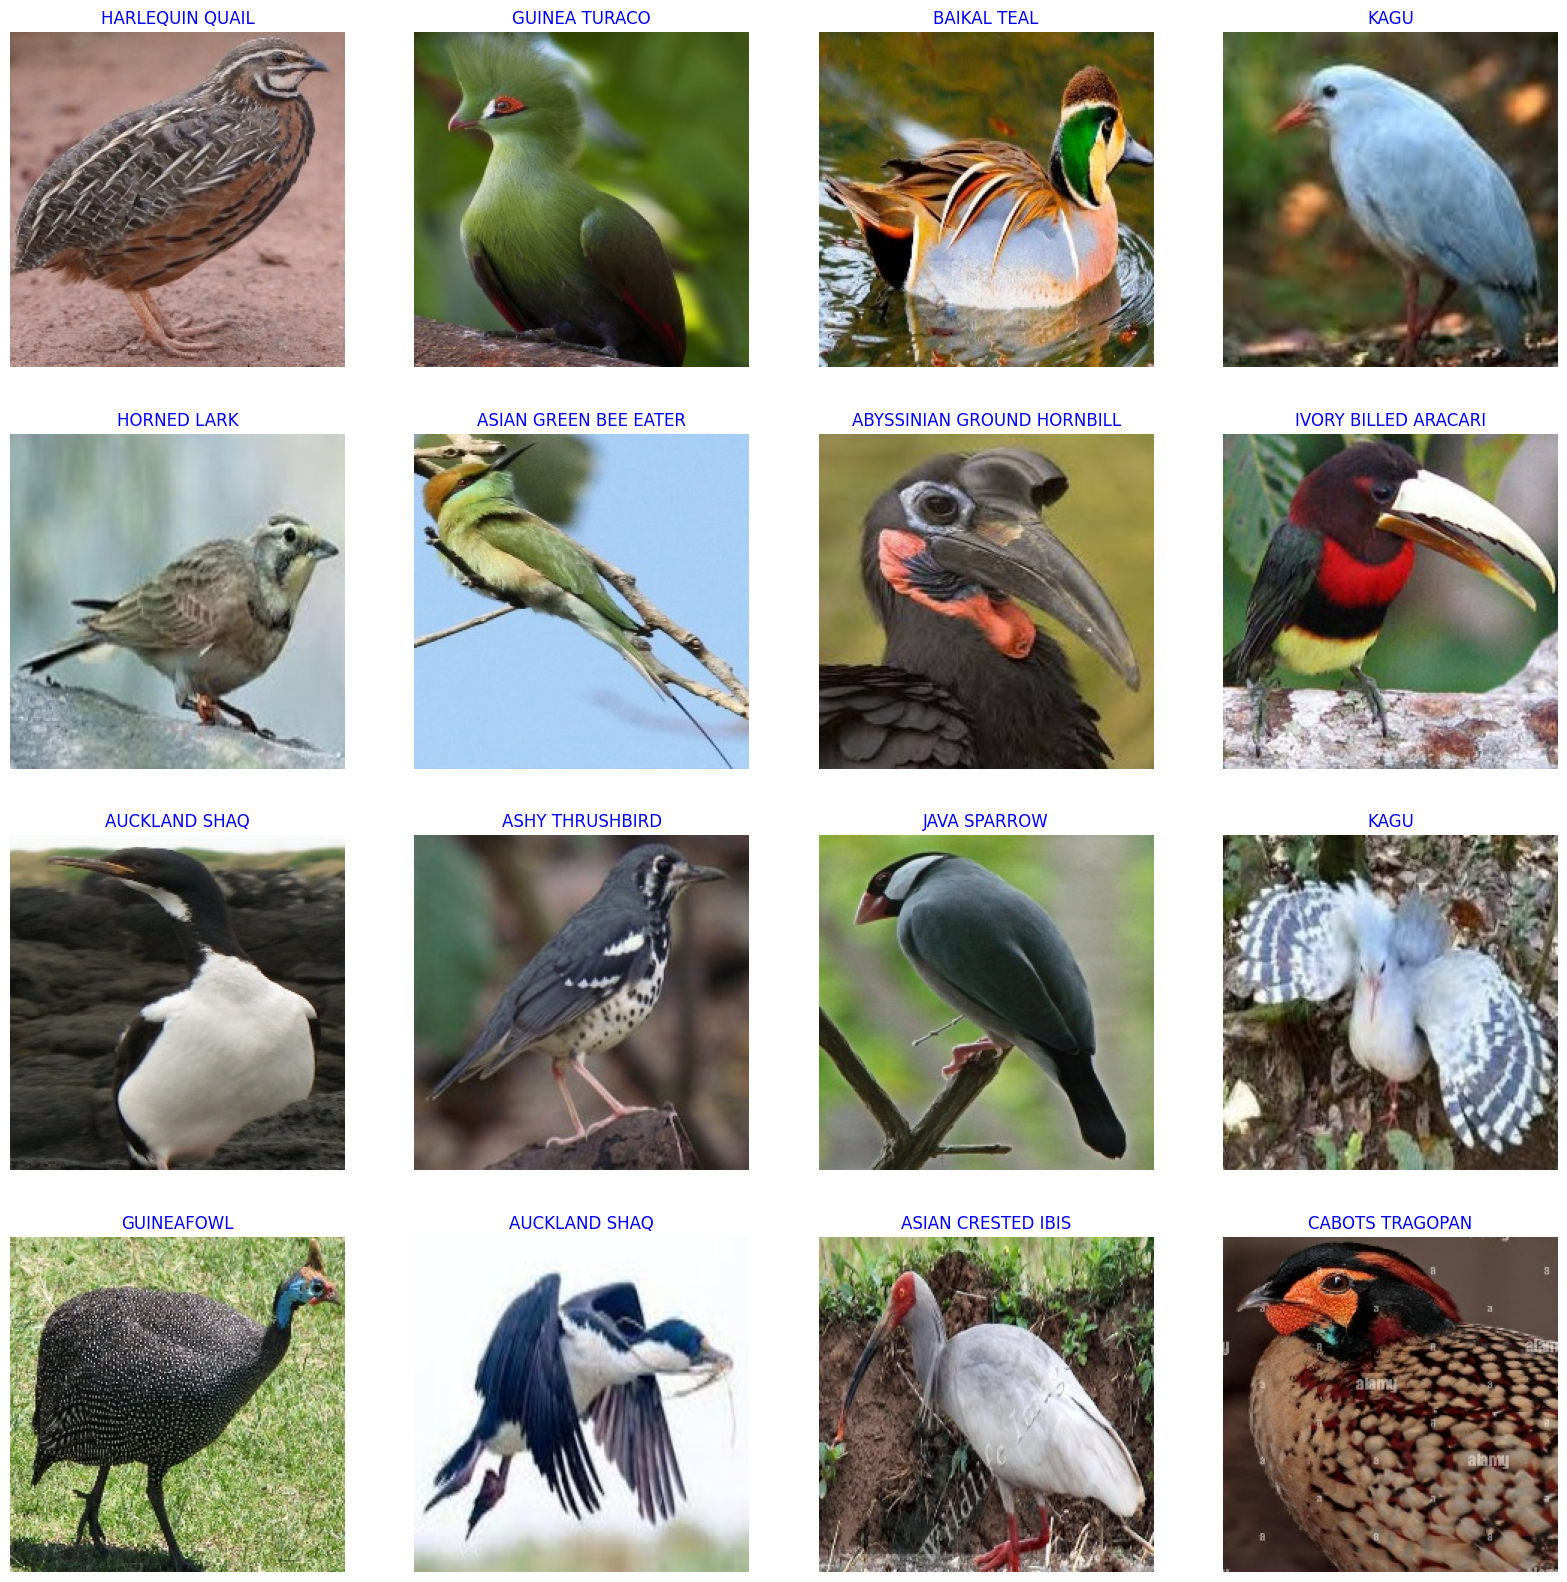

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
# base_model.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 101)               25957     
                                                         

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Set batch size and epochs
batch_size = 64
epochs = 5

# Define a checkpoint callback to save the model weights
checkpoint_filepath = '/content/drive/MyDrive/arun/Project/Birds/modelbirdcheckpoint.h5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, save_best_only=True)

# Check if a previous checkpoint exists and load weights if yes
if os.path.exists(checkpoint_filepath):
    model.load_weights(checkpoint_filepath)

# Train the model with the checkpoint callback
history = model.fit(
    x=train_gen,
    epochs=epochs,
    verbose=1,
    validation_data=valid_gen,
    validation_steps=None,
    shuffle=False,
    callbacks=[checkpoint_callback]  # Include the checkpoint callback
)


Epoch 1/5
254/254 [==============================] - 3354s 13s/step - loss: 7.0815 - accuracy: 0.6697 - val_loss: 4.0569 - val_accuracy: 0.9693
Epoch 2/5
Epoch 2/5
254/254 [==============================] - 213s 841ms/step - loss: 3.1289 - accuracy: 0.9425 - val_loss: 1.9920 - val_accuracy: 0.9898
Epoch 3/5
Epoch 3/5
254/254 [==============================] - 190s 747ms/step - loss: 1.6930 - accuracy: 0.9733 - val_loss: 1.1560 - val_accuracy: 0.9944
Epoch 4/5
Epoch 4/5
254/254 [==============================] - 189s 744ms/step - loss: 1.1157 - accuracy: 0.9837 - val_loss: 0.8264 - val_accuracy: 0.9976
Epoch 5/5
Epoch 5/5
254/254 [==============================] - 189s 745ms/step - loss: 0.8778 - accuracy: 0.9891 - val_loss: 0.6882 - val_accuracy: 0.9985


In [ ]:
#Save the model
model.save('trainedmodel.h5')

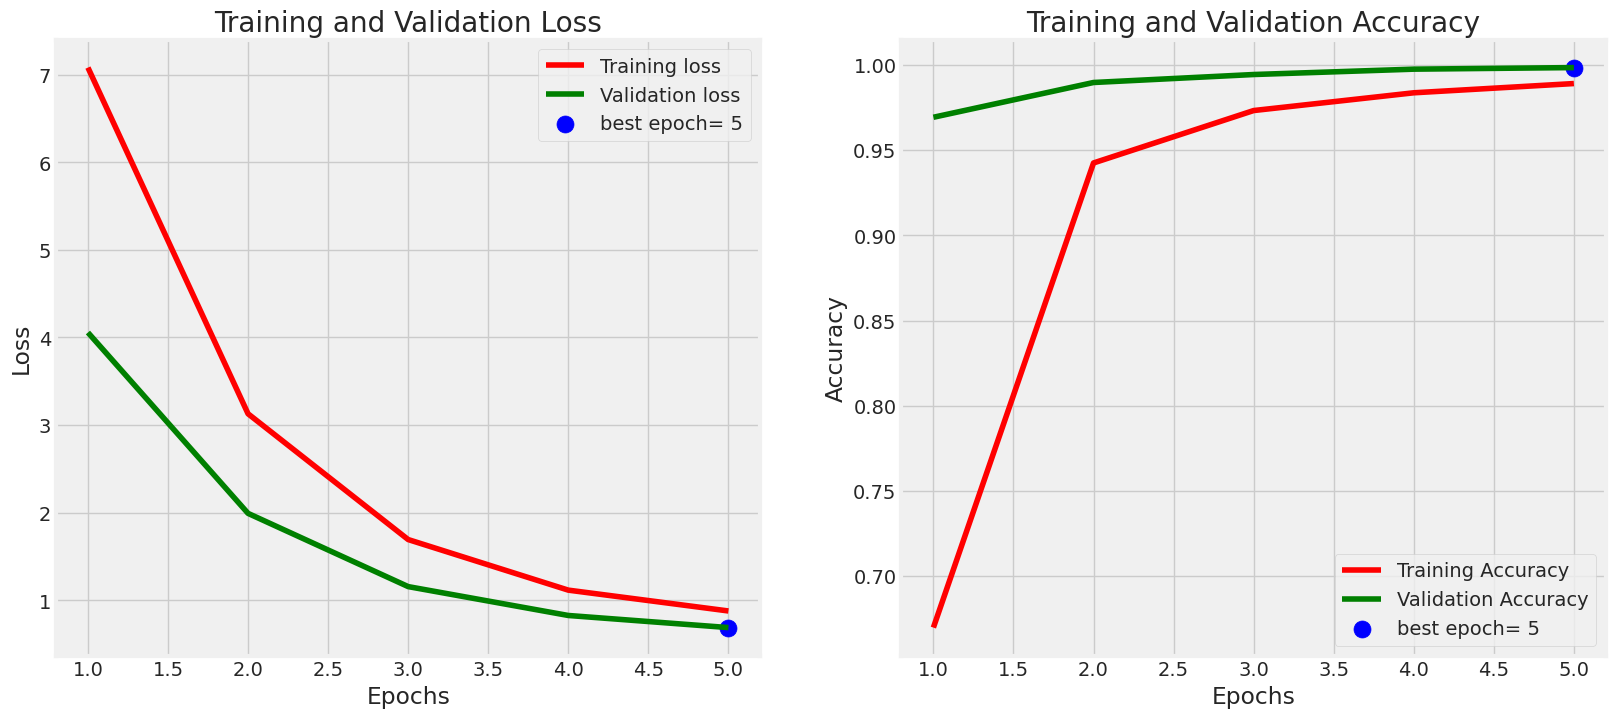

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

  8/101 [=>............................] - ETA: 20:51 - loss: 0.7144 - accuracy: 0.9960

101/101 [==============================] - 95s 943ms/step - loss: 0.7144 - accuracy: 0.9960
Train Loss:  0.6882727742195129
Train Accuracy:  0.9986076951026917
--------------------
Validation Loss:  0.6893293261528015
Validation Accuracy:  0.9984529614448547
--------------------
Test Loss:  0.7144182324409485
Test Accuracy:  0.996039628982544


In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

In [ ]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                            precision    recall  f1-score   support

             ABBOTTS BOOBY       1.00      1.00      1.00         5
ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
           ASHY THRUSHBIRD       1.00      1.00      1.00         5
        ASIAN CRESTED IBIS       1.00      1.00      1.00         5
        ASIAN DOLLARD BIRD       1.00      1.00      1.00         5
     ASIAN GREEN BEE EATER       1.00      1.00      1.00         5
      ASIAN OPENBILL STORK       1.00      1.00      1.00         5
             AUCKLAND SHAQ       1.00      1.00      1.00         5
         AUSTRAL CANASTERO       1.00      0.80      0.89         5
      AUSTRALASIAN FIGBIRD       1.00      1.00      1.00         5
                  AVADAVAT       1.00      1.00      1.00         5
          AZARAS SPINETAIL       0.83      1.00      0.91         5
      AZURE BREASTED PITTA       1.00      1.00      1.00         5
                 AZURE JAY       1.00      1.00

In [ ]:
loaded_model = tf.keras.models.load_model('trainedmodel.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
image_path = '/content/drive/MyDrive/arun/Project/Birds/test/AUCKLAND SHAQ/3.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

1/1 [==============================] - 4s 4s/step
AUCKLAND SHAQ
